# Predicting Car Price

In this project, we used the k-nearest neighbors algorithm to predict a car's market price using its attributes. The data set is from [here](https://archive.ics.uci.edu/ml/datasets/automobile).


There are 6 knn models:
1. Univariate knn model with default k value.
2. Univariate knn model with varying k values.
3. Multivariate knn model with default k value.
4. Multivariate knn model with varying k values.
5. Multivariate knn model with varying k values using 5-fold cross validation.
6. Multivariate knn model with varying k values using sklearn k-fold cross validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in data
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
#It seems there are no column names so far. From https://archive.ics.uci.edu/ml/datasets/automobile, we can fill in column names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# We are only interested in columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In this data cleaning step, we are going to deal with missing values, and normalize data for later use。

In [5]:
# we notice some cells have "?" in it, and we replace them by np.nan value.
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# check basic information about the dataset
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [7]:
# Some columns are of type 'object', and we want to convert them to 'float'
numeric_cars = numeric_cars.astype('float')

In [8]:
# Some columns have np.nan values, and we have to drop or replace them.
# For 'price' column we want to drop rows with missing 'price' values
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Normalize all columnns to range from 0 to 1 except the target column.
price = numeric_cars['price']
normalized_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
normalized_cars['price'] = price
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


We are going to build our models by using cleaned data "normalized_cars".

## Univariate Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [12]:
# the fist model is a basic knn model using one column and default k value
def knn_train_test_1_univariate_basic(training_col, target_col, df):
    df_len = df.shape[0]
    training_len = int(df_len/2)
    test_len = df_len - training_len
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # form training and testing data set
    train_df = rand_df.iloc[0:training_len]
    test_df = rand_df.iloc[training_len:]
    # train the model
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_col]], train_df[target_col])
    predictions = knn.predict(test_df[[training_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [13]:
# Use the first model to calculate rmses of models using each column
rmse_results = {}
numeric_cols = normalized_cars.columns.tolist()
# for each column, train a knn model and calculate rmse value
for col in numeric_cols[:-1]:
    rmse = knn_train_test_1_univariate_basic(col, 'price', normalized_cars)
    rmse_results[col] = rmse
# print rmse values of columns
pd.Series(rmse_results).sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Using 'horsepower' results in the best performance with the default k value.

In [14]:
# Next we want to modify the first model to accept a parameter for the k value
def knn_train_test_2_univariate_hyperparameter(training_col, target_col, df, kvals):
    df_len = df.shape[0]
    training_len = int(df_len/2)
    test_len = df_len - training_len
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # form training and testing data set
    train_df = rand_df.iloc[0:training_len]
    test_df = rand_df.iloc[training_len:]
    # train the model
    rmses  = {}
    for k in kvals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[training_col]], train_df[target_col])
        predictions = knn.predict(test_df[[training_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmses[k] = np.sqrt(mse)   
    return rmses

In [15]:
# Use the second model to calculate rmses of modesl using each column and varying k values.
rmses_k_results = {}
kvals = [1,3,5,7,9]
for col in numeric_cols[:-1]:
    rmses = knn_train_test_2_univariate_hyperparameter(col, 'price', normalized_cars,kvals)
    rmses_k_results[col] = rmses
rmses_k_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

### The best features from univariate model
From the above univariate model, we get different rmses for each feature with varying k values.

In order to find the best feature(s), we are going to calculate the average rmse across different k values.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#for each feature, compute the average rmse across different k values.
feature_avg_rmse = {}
for key, rmses in rmses_k_results.items():
    feature_avg_rmse[key] = np.mean(rmses.values())
feature_avg_rmse_Series = pd.Series(feature_avg_rmse).sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


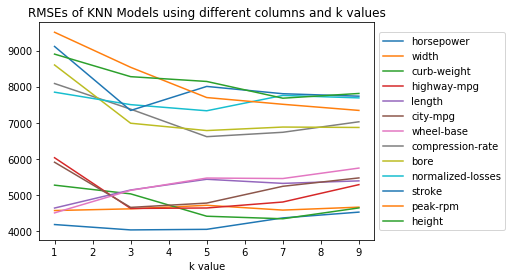

In [18]:
# genarate a graph to see the results using different columns and k values
#reorder rmses_k_results so that the order of rmses_k_results follows the above result
from collections import OrderedDict
rmses_k_results_reorder = OrderedDict()
for key in feature_avg_rmse_Series.index:
    rmses_k_results_reorder[key] = rmses_k_results[key]
plt.figure(num = len(rmses_k_results_reorder),figsize=(6,4))
plt.xlabel('k value')
plt.title('RMSEs of KNN Models using different columns and k values')
legend_cols = []
for key, rmses in rmses_k_results_reorder.items():
    legend_cols.append(key)
    rmses = OrderedDict(sorted(rmses.items()))
    x = list(rmses.keys())
    y = list(rmses.values())
    plt.plot(x,y)
plt.legend(legend_cols, loc='center left',bbox_to_anchor=(1, 0.5))
print(feature_avg_rmse_Series)

In [19]:
# get the order of columns in which univariate models perform
feature_avg_rmse_Series.index.tolist()

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

The best features from univariate model with hyperparameter optimazition (changing k values)
are in the order of 

'horsepower','width','curb-weight','highway-mpg','length','city-mpg',
'wheel-base','compression-rate','bore','normalized-losses','stroke', 'peak-rpm','height'

## Multivariate Model

In [20]:
# let's move to the third model which uses multiple columns but default k value
def knn_train_test_3_multivariate_basic(training_cols, target_col, df, k):
    df_len = df.shape[0]
    training_len = int(df_len/2)
    test_len = df_len - training_len
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # form training and testing data set
    train_df = rand_df.iloc[0:training_len]
    test_df = rand_df.iloc[training_len:]
    # train the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training_cols], train_df[target_col])
    predictions = knn.predict(test_df[training_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)   
    return rmse

In [21]:
# the results of knn models using different features
features_rmses = OrderedDict()
two_features = ['horsepower','width']
rmse = knn_train_test_3_multivariate_basic(two_features, 'price',normalized_cars, 5) 
features_rmses['two best featurs'] = rmse
three_features = ['horsepower','width','curb-weight']
rmse = knn_train_test_3_multivariate_basic(three_features, 'price',normalized_cars, 5) 
features_rmses['three best featurs'] = rmse
four_features = ['horsepower','width','curb-weight','highway-mpg']
rmse = knn_train_test_3_multivariate_basic(four_features, 'price',normalized_cars, 5) 
features_rmses['four best featurs'] = rmse
five_features = ['horsepower','width','curb-weight','highway-mpg','length']
rmse = knn_train_test_3_multivariate_basic(five_features, 'price',normalized_cars, 5) 
features_rmses['five best featurs'] = rmse
features_rmses

OrderedDict([('two best featurs', 3589.3132622073304),
             ('three best featurs', 3305.9401397969677),
             ('four best featurs', 3358.6915801682458),
             ('five best featurs', 3665.546673045813)])

## Multivariate Model with Hyperparameter Tuning

In [22]:
# modify the third model to accept different k values
def knn_train_test_4_multivariate_hyperparameter(training_cols, target_col, df, kvals):
    df_len = df.shape[0]
    training_len = int(df_len/2)
    test_len = df_len - training_len
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # form training and testing data set
    train_df = rand_df.iloc[0:training_len]
    test_df = rand_df.iloc[training_len:]
    # train the model
    rmses  = {}
    for k in kvals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[training_cols], train_df[target_col])
        predictions = knn.predict(test_df[training_cols])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmses[k] = np.sqrt(mse)   
    return rmses

In [23]:
# get the results of knn models with different features and k values
features_k_rmses = OrderedDict()
kvals = list(range(1,26))
two_features = ['horsepower','width']
rmse = knn_train_test_4_multivariate_hyperparameter(two_features, 'price',normalized_cars, kvals) 
features_k_rmses['two best featurs'] = rmse
three_features = ['horsepower','width','curb-weight']
rmse = knn_train_test_4_multivariate_hyperparameter(three_features, 'price',normalized_cars, kvals) 
features_k_rmses['three best featurs'] = rmse
four_features = ['horsepower','width','curb-weight','highway-mpg']
rmse = knn_train_test_4_multivariate_hyperparameter(four_features, 'price',normalized_cars, kvals) 
features_k_rmses['four best featurs'] = rmse
five_features = ['horsepower','width','curb-weight','highway-mpg','length']
rmse = knn_train_test_4_multivariate_hyperparameter(five_features, 'price',normalized_cars, kvals) 
features_k_rmses['five best featurs'] = rmse

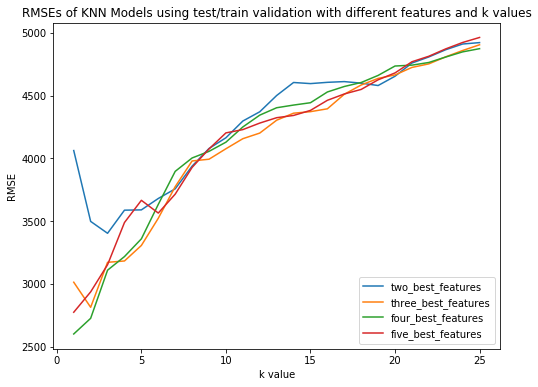

In [24]:
# generate a graph to show the results of knn models using different features and k values. 
# So far we've used test/train validation, and later we are going to use k-fold cross validation.
plt.figure(num = len(features_k_rmses),figsize=(8,6))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('RMSEs of KNN Models using test/train validation with different features and k values')
for key, rmses in features_k_rmses.items():
    x = list(rmses.keys())
    y = list(rmses.values())
    plt.plot(x,y)
legend_value = ['two_best_features','three_best_features','four_best_features','five_best_features']
plt.legend(legend_value, loc='lower right')

## Use k-fold cross validation

In [25]:
# First construct a 5-fold model by randomly seperating the data set to 5 folds
def knn_train_test_5_multivariate_hyperparameter_5fold(training_cols, target_col, df, kvals):
    df_len = df.shape[0]
    fold_len = int(df_len/5)
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # seperate df to 5 folds
    rand_df.loc[rand_df.index[:fold_len],'fold'] = 1
    rand_df.loc[rand_df.index[fold_len:fold_len*2],'fold'] = 2
    rand_df.loc[rand_df.index[fold_len*2:fold_len*3],'fold'] = 3
    rand_df.loc[rand_df.index[fold_len*3:fold_len*4],'fold'] = 4
    rand_df.loc[rand_df.index[fold_len*4:],'fold'] = 5
    # train the model
    rmses  = {}
    for k in kvals:
        rmses_kfolds = {}
        for iter in range(1,6):
            train_df = rand_df[rand_df['fold']!= iter]
            test_df = rand_df[rand_df['fold'] == iter].copy()
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(train_df[training_cols], train_df[target_col])
            predictions = knn.predict(test_df[training_cols])
            mse = mean_squared_error(test_df[target_col], predictions)
            rmses_kfolds[iter] = np.sqrt(mse)
        rmses[k] = np.mean(list(rmses_kfolds.values()))
    return rmses

In [26]:
# calulate results of knn models with different features and k values using a 5-fold cross validation
features_k_5fold_rmses = OrderedDict()
kvals = list(range(1,26))
two_features = ['horsepower','width']
rmse = knn_train_test_5_multivariate_hyperparameter_5fold(two_features, 'price',normalized_cars, kvals) 
features_k_5fold_rmses['two best featurs'] = rmse
three_features = ['horsepower','width','curb-weight']
rmse = knn_train_test_5_multivariate_hyperparameter_5fold(three_features, 'price',normalized_cars, kvals) 
features_k_5fold_rmses['three best featurs'] = rmse
four_features = ['horsepower','width','curb-weight','highway-mpg']
rmse = knn_train_test_5_multivariate_hyperparameter_5fold(four_features, 'price',normalized_cars, kvals) 
features_k_5fold_rmses['four best featurs'] = rmse
five_features = ['horsepower','width','curb-weight','highway-mpg','length']
rmse = knn_train_test_5_multivariate_hyperparameter_5fold(five_features, 'price',normalized_cars, kvals) 
features_k_5fold_rmses['five best featurs'] = rmse

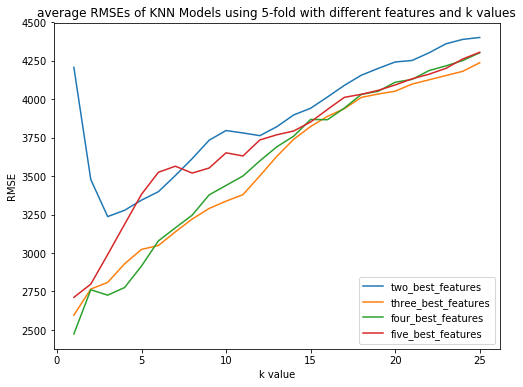

In [27]:
# generate a graph to show results of knn models with different features and k values using a 5-fold cross validation.
plt.figure(num = len(features_k_5fold_rmses),figsize=(8,6))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('average RMSEs of KNN Models using 5-fold with different features and k values')
for key, rmses in features_k_5fold_rmses.items():
    x = list(rmses.keys())
    y = list(rmses.values())
    plt.plot(x,y)
legend_value = ['two_best_features','three_best_features','four_best_features','five_best_features']
plt.legend(legend_value, loc='lower right')

In [28]:
# Next perform k-fold cross validation using sklearn.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def knn_train_test_6_multivariate_hyperparameter_kfold_scikit(training_cols, target_col, df, kvals, num_folds):
    kfold_rmses  = {}
    for k in kvals:
        rmses_kfolds = []
        for fold in num_folds:
            kf = KFold(fold, shuffle=True, random_state=1)
            model = KNeighborsRegressor(n_neighbors=k)
            mses = cross_val_score(model, df[training_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
            rmses = np.sqrt(np.absolute(mses))
            fold_avg_rmse = np.mean(rmses)
            rmses_kfolds.append(fold_avg_rmse)
        kfold_rmses[k] = np.mean(rmses_kfolds)
    return kfold_rmses

In [29]:
# calculate results of knn models with different features and k values using k-fold cross validation
features_k_kfold_scikit_rmses = OrderedDict()
kvals = list(range(1,26))
num_folds = [3,5,7,9,11]
two_features = ['horsepower','width']
rmses = knn_train_test_6_multivariate_hyperparameter_kfold_scikit(two_features, 'price',normalized_cars, kvals,num_folds) 
features_k_kfold_scikit_rmses['two best featurs'] = rmses
three_features = ['horsepower','width','curb-weight']
rmses = knn_train_test_6_multivariate_hyperparameter_kfold_scikit(three_features, 'price',normalized_cars, kvals,num_folds) 
features_k_kfold_scikit_rmses['three best featurs'] = rmses
four_features = ['horsepower','width','curb-weight','highway-mpg']
rmses = knn_train_test_6_multivariate_hyperparameter_kfold_scikit(four_features, 'price',normalized_cars, kvals,num_folds) 
features_k_kfold_scikit_rmses['four best featurs'] = rmses
five_features = ['horsepower','width','curb-weight','highway-mpg','length']
rmses = knn_train_test_6_multivariate_hyperparameter_kfold_scikit(five_features, 'price',normalized_cars, kvals,num_folds) 
features_k_kfold_scikit_rmses['five best featurs'] = rmses

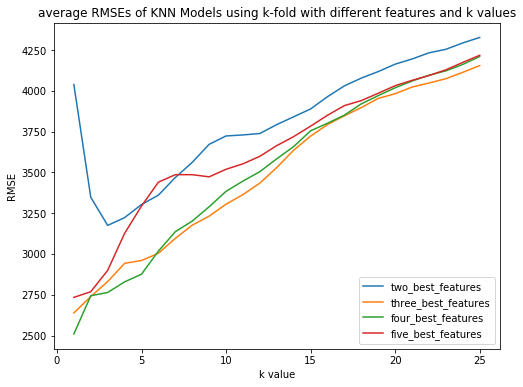

In [30]:
# generate a graph to show results of knn models with different features and k values using k-fold cross validation.
plt.figure(num = len(features_k_kfold_scikit_rmses),figsize=(8,6))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('average RMSEs of KNN Models using k-fold with different features and k values')
for key, rmses in features_k_kfold_scikit_rmses.items():
    x = list(rmses.keys())
    y = list(rmses.values())
    plt.plot(x,y)
legend_value = ['two_best_features','three_best_features','four_best_features','five_best_features']
plt.legend(legend_value, loc='lower right')

In [31]:
# the above two graphs using 5-fold and sklean k-fold cross validation look very similar, let's print out numbers
print("RMSEs using 5-fold with different features and k values:")
print(pd.DataFrame.from_dict(features_k_5fold_rmses))
print(" \n")
print("RMSEs using 5-fold with different features and k values:")
print(pd.DataFrame.from_dict(features_k_kfold_scikit_rmses))

RMSEs using 5-fold with different features and k values:
    two best featurs  three best featurs  four best featurs  five best featurs
1        4207.446398         2596.312905        2473.822164        2711.938306
2        3478.184792         2765.782624        2761.473629        2797.729666
3        3237.081827         2809.190680        2726.090433        2990.051121
4        3278.113082         2930.060020        2775.969865        3187.233983
5        3344.064579         3023.550319        2915.706158        3381.933948
6        3399.047599         3049.440630        3079.172384        3525.219606
7        3503.785878         3137.547361        3163.924297        3564.644267
8        3614.170114         3221.318744        3246.708354        3520.044621
9        3733.544438         3289.940091        3378.249923        3552.912316
10       3796.642542         3337.584359        3439.457904        3651.794083
11       3780.796361         3379.620176        3501.038157        3631.16

The results of usnig 5-fold validation and sklearn k-fold cross validation are almost the same.

## Conclusion: 
From our experiments, the best KNN model takes four features ('horsepower','width','curb-weight','highway-mpg') and the hyperparameter k = 3.